In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_training = pd.read_csv('train.csv')
df_validation = pd.read_csv('validation.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
display(df.head())

,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,Musim,Cuaca,Event_Lokal
0,2023-10-12,Coklat P,Coklat,Brand2,24300.0,800.0,23,248,57,Bundling,Ramadhan,Hujan,Pameran
1,2023-02-04,Susu A,Susu,Brand1,30500.0,2700.0,19,223,35,Diskon Persen,Normal,Hujan,Konser
2,2024-01-03,Susu A,Susu,Brand1,26200.0,5500.0,24,166,19,Bundling,Ramadhan,Hujan,Festival
3,2023-03-17,Soda K,Soda,Brand2,49000.0,13100.0,21,218,5,Diskon Nominal,Ramadhan,Mendung,Pameran
4,2024-09-29,Biskuit Y,Biskuit,Brand2,28100.0,2600.0,16,153,26,Bundling,Normal,Cerah,Festival


In [ ]:
import pandas as pd

df = pd.read_csv('/content/validation.csv')
display(df.head())

,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,Musim,Cuaca,Event_Lokal
0,2023-05-04,Susu C,Susu,Brand1,26600.0,5300.0,18,268,0,Bundling,Libur Nasional,Hujan,Pameran
1,2024-06-03,Susu A,Susu,Brand2,20800.0,3400.0,13,160,48,Diskon Nominal,Ramadhan,Mendung,Pameran
2,2024-02-20,Susu A,Susu,Brand3,27500.0,1000.0,15,152,10,Tidak Ada Promo,Normal,Mendung,Festival
3,2024-11-26,Coklat Q,Coklat,Brand2,19500.0,5800.0,21,281,37,Diskon Nominal,Ramadhan,Cerah,Konser
4,2024-12-16,Soda L,Soda,Brand3,28000.0,4200.0,23,187,37,Bundling,Libur Nasional,Hujan,Konser




#EDA





In [ ]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         800 non-null    object 
 1   Produk          800 non-null    object 
 2   Kategori        800 non-null    object 
 3   Brand           800 non-null    object 
 4   Harga_Jual      800 non-null    float64
 5   Diskon          800 non-null    float64
 6   Jumlah_Terjual  800 non-null    int64  
 7   Stok_Harian     800 non-null    int64  
 8   Stok_Aging      800 non-null    int64  
 9   Jenis_Promo     800 non-null    object 
 10  Musim           800 non-null    object 
 11  Cuaca           800 non-null    object 
 12  Event_Lokal     800 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 81.4+ KB


In [ ]:
display(df.info())
display(df.isnull().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         200 non-null    object 
 1   Produk          200 non-null    object 
 2   Kategori        200 non-null    object 
 3   Brand           200 non-null    object 
 4   Harga_Jual      200 non-null    float64
 5   Diskon          200 non-null    float64
 6   Jumlah_Terjual  200 non-null    int64  
 7   Stok_Harian     200 non-null    int64  
 8   Stok_Aging      200 non-null    int64  
 9   Jenis_Promo     200 non-null    object 
 10  Musim           200 non-null    object 
 11  Cuaca           200 non-null    object 
 12  Event_Lokal     200 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 20.4+ KB


None

,0
Tanggal,0
Produk,0
Kategori,0
Brand,0
Harga_Jual,0
Diskon,0
Jumlah_Terjual,0
Stok_Harian,0
Stok_Aging,0
Jenis_Promo,0


,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,27350.500000,4101.500000,19.620000,206.020000,29.365000
std,12732.560237,3098.637689,9.422821,48.487678,18.477251
min,5200.000000,0.000000,0.000000,52.000000,0.000000
25%,15775.000000,1675.000000,13.000000,176.000000,12.750000
50%,27850.000000,3500.000000,19.000000,204.000000,27.000000
75%,37350.000000,5725.000000,26.000000,238.000000,46.250000
max,49900.000000,13800.000000,46.000000,359.000000,60.000000


#Data Cleaning

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows: 0


In [ ]:
categorical_cols = ['Kategori', 'Brand', 'Jenis_Promo', 'Musim', 'Cuaca', 'Event_Lokal']

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    display(df[col].unique())
    print("-" * 30)

Unique values in 'Kategori':


array(['Susu', 'Coklat', 'Soda', 'Biskuit', 'Sirup'], dtype=object)

------------------------------
Unique values in 'Brand':


array(['Brand1', 'Brand2', 'Brand3'], dtype=object)

------------------------------
Unique values in 'Jenis_Promo':


array(['Bundling', 'Diskon Nominal', 'Tidak Ada Promo', 'Diskon Persen'],
      dtype=object)

------------------------------
Unique values in 'Musim':


array(['Libur Nasional', 'Ramadhan', 'Normal', 'Natal'], dtype=object)

------------------------------
Unique values in 'Cuaca':


array(['Hujan', 'Mendung', 'Cerah'], dtype=object)

------------------------------
Unique values in 'Event_Lokal':


array(['Pameran', 'Festival', 'Konser', 'Tidak Ada Event'], dtype=object)

------------------------------


In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')

# Periksa apakah ada nilai NaT
if df['Tanggal'].isnull().sum() > 0:
    print("Warning: Some dates could not be parsed and were converted to NaT.")

print("Data types after converting 'Tanggal':")
display(df.info())

print("-" * 30)

# 2. Menghapus Duplikasi Baris Data
duplicates_before = len(df)
df = df.drop_duplicates()
duplicates_after = len(df)

print(f"Number of duplicate rows removed: {duplicates_before - duplicates_after}")

print(f"Number of rows after removing duplicates: {len(df)}")

Data types after converting 'Tanggal':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         200 non-null    datetime64[ns]
 1   Produk          200 non-null    object        
 2   Kategori        200 non-null    object        
 3   Brand           200 non-null    object        
 4   Harga_Jual      200 non-null    float64       
 5   Diskon          200 non-null    float64       
 6   Jumlah_Terjual  200 non-null    int64         
 7   Stok_Harian     200 non-null    int64         
 8   Stok_Aging      200 non-null    int64         
 9   Jenis_Promo     200 non-null    object        
 10  Musim           200 non-null    object        
 11  Cuaca           200 non-null    object        
 12  Event_Lokal     200 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 20.

None

------------------------------
Number of duplicate rows removed: 0
Number of rows after removing duplicates: 200


#Data Preprocess

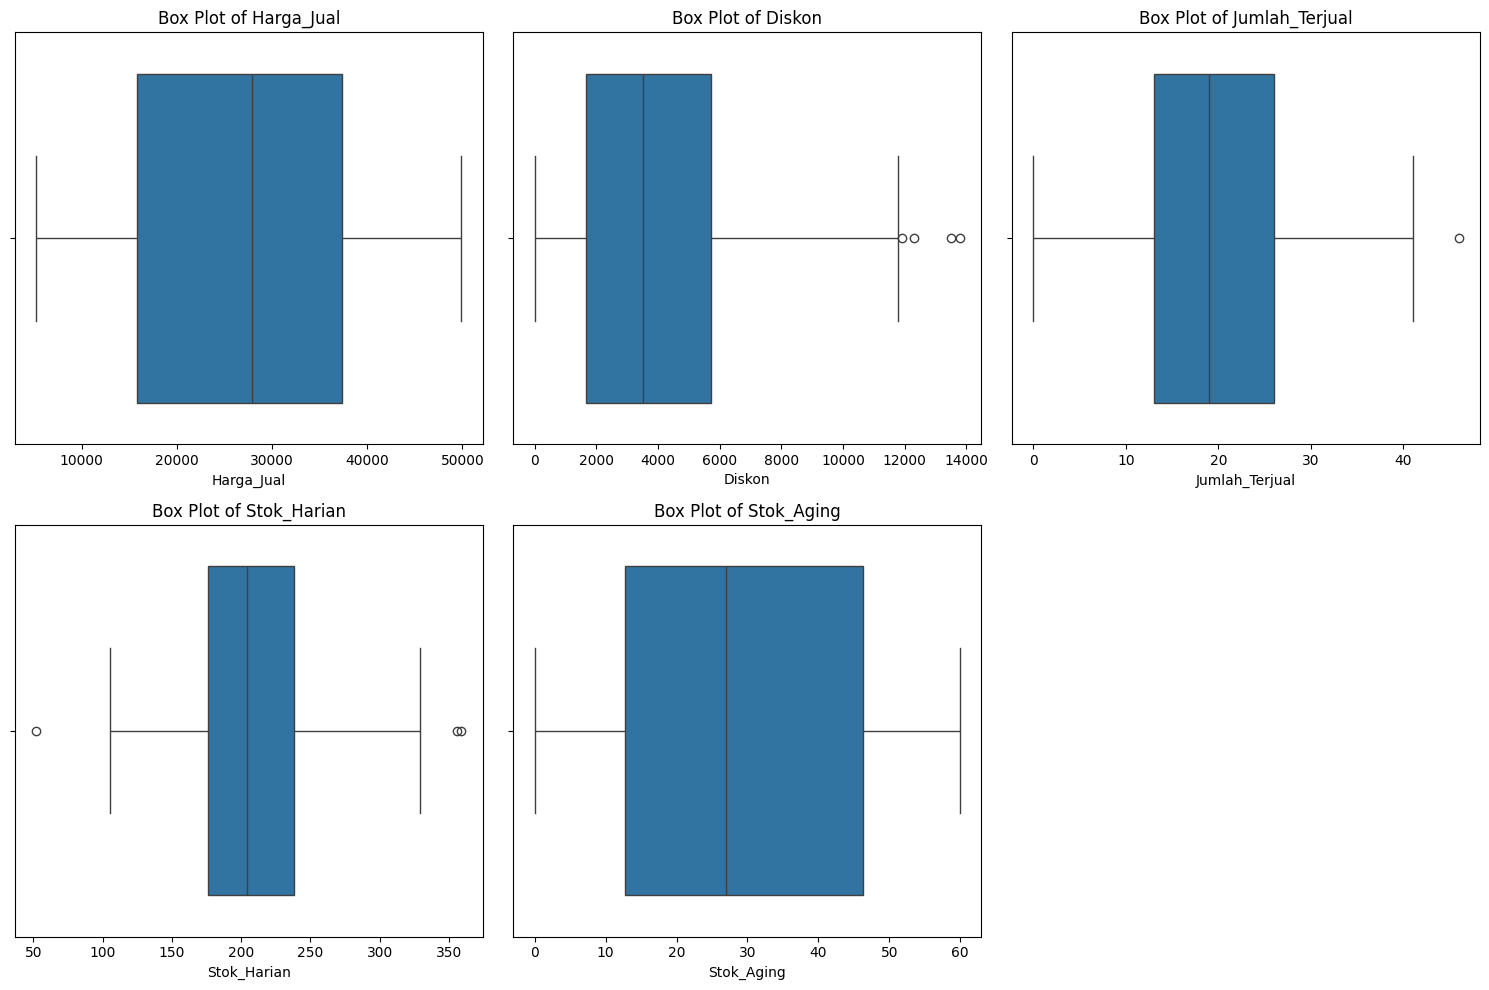

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Harga_Jual', 'Diskon', 'Jumlah_Terjual', 'Stok_Harian', 'Stok_Aging']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Display rows with the highest 'Harga_Jual' values
print("Rows with highest 'Harga_Jual':")
display(df.nlargest(5, 'Harga_Jual'))
print("-" * 50)

# Display rows with the highest 'Diskon' values
print("Rows with highest 'Diskon':")
display(df.nlargest(5, 'Diskon'))
print("-" * 50)

# Display rows with the highest 'Jumlah_Terjual' values
print("Rows with highest 'Jumlah_Terjual':")
display(df.nlargest(5, 'Jumlah_Terjual'))
print("-" * 50)

Rows with highest 'Harga_Jual':


,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,Musim,Cuaca,Event_Lokal
107,2024-12-24,Susu C,Susu,Brand2,49900.0,7000.0,17,155,20,Diskon Nominal,Normal,Hujan,Konser
177,2023-10-15,Sirup O,Sirup,Brand3,49900.0,3900.0,14,268,22,Diskon Nominal,Natal,Cerah,Konser
44,2024-02-15,Sirup N,Sirup,Brand3,49800.0,11800.0,22,187,46,Diskon Persen,Normal,Mendung,Konser
112,2023-02-02,Susu C,Susu,Brand3,49800.0,10900.0,21,222,2,Diskon Nominal,Normal,Mendung,Pameran
77,2023-09-29,Soda K,Soda,Brand1,49500.0,5900.0,25,268,43,Bundling,Libur Nasional,Mendung,Pameran


--------------------------------------------------
Rows with highest 'Diskon':


,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,Musim,Cuaca,Event_Lokal
105,2024-03-05,Sirup M,Sirup,Brand3,46900.0,13800.0,15,207,54,Diskon Nominal,Libur Nasional,Mendung,Tidak Ada Event
148,2024-08-04,Soda J,Soda,Brand2,47100.0,13500.0,17,279,51,Bundling,Ramadhan,Mendung,Tidak Ada Event
52,2024-08-08,Soda K,Soda,Brand3,43800.0,12300.0,24,187,50,Bundling,Normal,Hujan,Pameran
12,2024-10-19,Sirup O,Sirup,Brand2,41000.0,11900.0,38,254,56,Bundling,Libur Nasional,Mendung,Pameran
44,2024-02-15,Sirup N,Sirup,Brand3,49800.0,11800.0,22,187,46,Diskon Persen,Normal,Mendung,Konser


--------------------------------------------------
Rows with highest 'Jumlah_Terjual':


,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,Musim,Cuaca,Event_Lokal
167,2023-08-02,Coklat R,Coklat,Brand1,9700.0,1500.0,46,124,59,Bundling,Ramadhan,Cerah,Festival
83,2023-12-13,Biskuit Y,Biskuit,Brand2,31300.0,1300.0,41,191,11,Bundling,Natal,Mendung,Festival
19,2024-04-18,Soda K,Soda,Brand3,45400.0,600.0,40,146,19,Diskon Nominal,Normal,Cerah,Konser
162,2023-12-03,Sirup N,Sirup,Brand1,13100.0,2800.0,40,154,17,Diskon Nominal,Libur Nasional,Cerah,Konser
100,2024-09-20,Soda J,Soda,Brand1,32000.0,4000.0,39,196,22,Tidak Ada Promo,Libur Nasional,Hujan,Pameran


--------------------------------------------------


In [ ]:
numerical_cols = ['Harga_Jual', 'Diskon', 'Jumlah_Terjual', 'Stok_Harian', 'Stok_Aging']

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("Number of outliers detected using IQR method:")
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"- '{col}': {len(outliers)} outliers")

Number of outliers detected using IQR method:
- 'Harga_Jual': 0 outliers
- 'Diskon': 4 outliers
- 'Jumlah_Terjual': 1 outliers
- 'Stok_Harian': 3 outliers
- 'Stok_Aging': 0 outliers


In [ ]:
numerical_cols_with_outliers = ['Diskon', 'Jumlah_Terjual', 'Stok_Harian']

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_index = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers_index

all_outliers_index = pd.Index([])
for col in numerical_cols_with_outliers:
    outliers_index = detect_outliers_iqr(df, col)
    all_outliers_index = all_outliers_index.union(outliers_index) # Combine indices from all columns

print(f"Total number of rows with outliers to be removed: {len(all_outliers_index)}")

# Remove rows with outliers
df_cleaned = df.drop(all_outliers_index)

print(f"Number of rows after removing outliers: {len(df_cleaned)}")

print("\nInfo of the cleaned DataFrame:")
display(df_cleaned.info())

Total number of rows with outliers to be removed: 8
Number of rows after removing outliers: 192

Info of the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         192 non-null    datetime64[ns]
 1   Produk          192 non-null    object        
 2   Kategori        192 non-null    object        
 3   Brand           192 non-null    object        
 4   Harga_Jual      192 non-null    float64       
 5   Diskon          192 non-null    float64       
 6   Jumlah_Terjual  192 non-null    int64         
 7   Stok_Harian     192 non-null    int64         
 8   Stok_Aging      192 non-null    int64         
 9   Jenis_Promo     192 non-null    object        
 10  Musim           192 non-null    object        
 11  Cuaca           192 non-null    object        
 12  Event_Lokal     192 non-null    object 

None

#Feature Engineering

In [ ]:
df_cleaned = df_cleaned.sort_values(by='Tanggal')

# lag features for 'Jumlah_Terjual'
# Lag 7 days (last week)
df_cleaned['Jumlah_Terjual_Lag_7'] = df_cleaned['Jumlah_Terjual'].shift(7)

# Lag 30 days (last month)
df_cleaned['Jumlah_Terjual_Lag_30'] = df_cleaned['Jumlah_Terjual'].shift(30)

print("DataFrame with new lag features:")
display(df_cleaned.head())

DataFrame with new lag features:


,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,Musim,Cuaca,Event_Lokal,Jumlah_Terjual_Lag_7,Jumlah_Terjual_Lag_30
96,2023-01-02,Coklat P,Coklat,Brand2,37900.0,7300.0,18,233,37,Tidak Ada Promo,Normal,Cerah,Konser,NaN,NaN
72,2023-01-04,Sirup M,Sirup,Brand2,34600.0,3600.0,10,211,57,Diskon Persen,Ramadhan,Cerah,Pameran,NaN,NaN
92,2023-01-09,Coklat Q,Coklat,Brand1,10200.0,2500.0,20,127,52,Diskon Nominal,Natal,Mendung,Pameran,NaN,NaN
161,2023-01-10,Susu C,Susu,Brand3,16500.0,3900.0,9,211,45,Tidak Ada Promo,Ramadhan,Hujan,Tidak Ada Event,NaN,NaN
67,2023-01-14,Susu B,Susu,Brand1,45200.0,9300.0,27,119,35,Bundling,Normal,Mendung,Tidak Ada Event,NaN,NaN


In [ ]:
df_cleaned = df_cleaned.sort_values(by='Tanggal')

# Rolling average feature for 'Jumlah_Terjual' over a 7-day
# min_periods=1 allows calculation even if there are fewer than 7 days of data initially
df_cleaned['Jumlah_Terjual_Rolling_Mean_7'] = df_cleaned['Jumlah_Terjual'].rolling(window=7, min_periods=1).mean()

print("DataFrame with new rolling average feature:")
display(df_cleaned.head())

DataFrame with new rolling average feature:


,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,Musim,Cuaca,Event_Lokal,Jumlah_Terjual_Lag_7,Jumlah_Terjual_Lag_30,Jumlah_Terjual_Rolling_Mean_7
96,2023-01-02,Coklat P,Coklat,Brand2,37900.0,7300.0,18,233,37,Tidak Ada Promo,Normal,Cerah,Konser,NaN,NaN,18.00
72,2023-01-04,Sirup M,Sirup,Brand2,34600.0,3600.0,10,211,57,Diskon Persen,Ramadhan,Cerah,Pameran,NaN,NaN,14.00
92,2023-01-09,Coklat Q,Coklat,Brand1,10200.0,2500.0,20,127,52,Diskon Nominal,Natal,Mendung,Pameran,NaN,NaN,16.00
161,2023-01-10,Susu C,Susu,Brand3,16500.0,3900.0,9,211,45,Tidak Ada Promo,Ramadhan,Hujan,Tidak Ada Event,NaN,NaN,14.25
67,2023-01-14,Susu B,Susu,Brand1,45200.0,9300.0,27,119,35,Bundling,Normal,Mendung,Tidak Ada Event,NaN,NaN,16.80


In [ ]:
# Extract date-related features from the 'Tanggal' column
df_cleaned['Tahun'] = df_cleaned['Tanggal'].dt.year
df_cleaned['Bulan'] = df_cleaned['Tanggal'].dt.month
df_cleaned['Hari_dalam_Seminggu'] = df_cleaned['Tanggal'].dt.dayofweek # Monday=0, Sunday=6

print("DataFrame with extracted date features:")
display(df_cleaned.head())

DataFrame with extracted date features:


,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,Musim,Cuaca,Event_Lokal,Jumlah_Terjual_Lag_7,Jumlah_Terjual_Lag_30,Jumlah_Terjual_Rolling_Mean_7,Tahun,Bulan,Hari_dalam_Seminggu
96,2023-01-02,Coklat P,Coklat,Brand2,37900.0,7300.0,18,233,37,Tidak Ada Promo,Normal,Cerah,Konser,NaN,NaN,18.00,2023,1,0
72,2023-01-04,Sirup M,Sirup,Brand2,34600.0,3600.0,10,211,57,Diskon Persen,Ramadhan,Cerah,Pameran,NaN,NaN,14.00,2023,1,2
92,2023-01-09,Coklat Q,Coklat,Brand1,10200.0,2500.0,20,127,52,Diskon Nominal,Natal,Mendung,Pameran,NaN,NaN,16.00,2023,1,0
161,2023-01-10,Susu C,Susu,Brand3,16500.0,3900.0,9,211,45,Tidak Ada Promo,Ramadhan,Hujan,Tidak Ada Event,NaN,NaN,14.25,2023,1,1
67,2023-01-14,Susu B,Susu,Brand1,45200.0,9300.0,27,119,35,Bundling,Normal,Mendung,Tidak Ada Event,NaN,NaN,16.80,2023,1,5


In [ ]:
# inventory columns
print("Info on Inventory Status columns ('Stok_Harian' and 'Stok_Aging'):")
display(df_cleaned[['Stok_Harian', 'Stok_Aging']].info())

print("\nFirst 5 rows showing Inventory Status columns:")
display(df_cleaned[['Stok_Harian', 'Stok_Aging']].head())

Info on Inventory Status columns ('Stok_Harian' and 'Stok_Aging'):
<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 96 to 15
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Stok_Harian  192 non-null    int64
 1   Stok_Aging   192 non-null    int64
dtypes: int64(2)
memory usage: 4.5 KB


None


First 5 rows showing Inventory Status columns:


,Stok_Harian,Stok_Aging
96,233,37
72,211,57
92,127,52
161,211,45
67,119,35


In [ ]:
# Binary feature for promo indicator
# It will be 1 if 'Jenis_Promo' is not 'Tidak Ada Promo', and 0 otherwise
df_cleaned['Promo_Indicator'] = (df_cleaned['Jenis_Promo'] != 'Tidak Ada Promo').astype(int)

print("DataFrame with new 'Promo_Indicator' feature:")
display(df_cleaned[['Jenis_Promo', 'Promo_Indicator']].head())

DataFrame with new 'Promo_Indicator' feature:


,Jenis_Promo,Promo_Indicator
96,Tidak Ada Promo,0
72,Diskon Persen,1
92,Diskon Nominal,1
161,Tidak Ada Promo,0
67,Bundling,1


#Encoding

In [ ]:
# Perform One-Hot Encoding for 'Hari_dalam_Seminggu'
df_cleaned = pd.get_dummies(df_cleaned, columns=['Hari_dalam_Seminggu'], prefix='Hari')

print("DataFrame with One-Hot Encoded 'Hari_dalam_Seminggu' features:")
display(df_cleaned.head())

DataFrame with One-Hot Encoded 'Hari_dalam_Seminggu' features:


,Tanggal,Produk,Kategori,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Jenis_Promo,...,Tahun,Bulan,Promo_Indicator,Hari_0,Hari_1,Hari_2,Hari_3,Hari_4,Hari_5,Hari_6
96,2023-01-02,Coklat P,Coklat,Brand2,37900.0,7300.0,18,233,37,Tidak Ada Promo,...,2023,1,0,True,False,False,False,False,False,False
72,2023-01-04,Sirup M,Sirup,Brand2,34600.0,3600.0,10,211,57,Diskon Persen,...,2023,1,1,False,False,True,False,False,False,False
92,2023-01-09,Coklat Q,Coklat,Brand1,10200.0,2500.0,20,127,52,Diskon Nominal,...,2023,1,1,True,False,False,False,False,False,False
161,2023-01-10,Susu C,Susu,Brand3,16500.0,3900.0,9,211,45,Tidak Ada Promo,...,2023,1,0,False,True,False,False,False,False,False
67,2023-01-14,Susu B,Susu,Brand1,45200.0,9300.0,27,119,35,Bundling,...,2023,1,1,False,False,False,False,False,True,False


In [ ]:
# One-Hot Encoding for 'Kategori' and 'Jenis_Promo'
df_cleaned = pd.get_dummies(df_cleaned, columns=['Kategori', 'Jenis_Promo'], prefix=['Kategori', 'Promo'])

print("DataFrame with One-Hot Encoded 'Kategori' and 'Jenis_Promo' features:")
display(df_cleaned.head())

DataFrame with One-Hot Encoded 'Kategori' and 'Jenis_Promo' features:


,Tanggal,Produk,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Musim,Cuaca,...,Hari_6,Kategori_Biskuit,Kategori_Coklat,Kategori_Sirup,Kategori_Soda,Kategori_Susu,Promo_Bundling,Promo_Diskon Nominal,Promo_Diskon Persen,Promo_Tidak Ada Promo
96,2023-01-02,Coklat P,Brand2,37900.0,7300.0,18,233,37,Normal,Cerah,...,False,False,True,False,False,False,False,False,False,True
72,2023-01-04,Sirup M,Brand2,34600.0,3600.0,10,211,57,Ramadhan,Cerah,...,False,False,False,True,False,False,False,False,True,False
92,2023-01-09,Coklat Q,Brand1,10200.0,2500.0,20,127,52,Natal,Mendung,...,False,False,True,False,False,False,False,True,False,False
161,2023-01-10,Susu C,Brand3,16500.0,3900.0,9,211,45,Ramadhan,Hujan,...,False,False,False,False,False,True,False,False,False,True
67,2023-01-14,Susu B,Brand1,45200.0,9300.0,27,119,35,Normal,Mendung,...,False,False,False,False,False,True,True,False,False,False


#Modelling

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(df_cleaned, test_size=0.3, random_state=42)

df_validation, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

print(f"Original DataFrame shape: {df_cleaned.shape}")
print(f"Train set shape: {df_train.shape}")
print(f"Validation set shape: {df_validation.shape}")
print(f"Test set shape: {df_test.shape}")

print("\nTrain set head:")
display(df_train.head())

print("\nValidation set head:")
display(df_validation.head())

print("\nTest set head:")
display(df_test.head())

Original DataFrame shape: (192, 33)
Train set shape: (134, 33)
Validation set shape: (29, 33)
Test set shape: (29, 33)

Train set head:


,Tanggal,Produk,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Musim,Cuaca,...,Hari_6,Kategori_Biskuit,Kategori_Coklat,Kategori_Sirup,Kategori_Soda,Kategori_Susu,Promo_Bundling,Promo_Diskon Nominal,Promo_Diskon Persen,Promo_Tidak Ada Promo
28,2023-02-10,Susu C,Brand2,37300.0,9200.0,21,265,41,Ramadhan,Mendung,...,False,False,False,False,False,True,False,False,True,False
6,2023-07-29,Soda L,Brand3,19400.0,2100.0,28,196,9,Libur Nasional,Hujan,...,False,False,False,False,True,False,False,False,True,False
175,2024-09-24,Coklat P,Brand2,21300.0,2500.0,2,263,2,Ramadhan,Cerah,...,False,False,True,False,False,False,False,False,True,False
107,2024-12-24,Susu C,Brand2,49900.0,7000.0,17,155,20,Normal,Hujan,...,False,False,False,False,False,True,False,True,False,False
138,2024-11-30,Coklat P,Brand1,9500.0,2200.0,14,189,46,Libur Nasional,Hujan,...,False,False,True,False,False,False,True,False,False,False



Validation set head:


,Tanggal,Produk,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Musim,Cuaca,...,Hari_6,Kategori_Biskuit,Kategori_Coklat,Kategori_Sirup,Kategori_Soda,Kategori_Susu,Promo_Bundling,Promo_Diskon Nominal,Promo_Diskon Persen,Promo_Tidak Ada Promo
177,2023-10-15,Sirup O,Brand3,49900.0,3900.0,14,268,22,Natal,Cerah,...,True,False,False,True,False,False,False,True,False,False
139,2024-01-06,Coklat Q,Brand1,9400.0,2500.0,3,159,11,Ramadhan,Cerah,...,False,False,True,False,False,False,False,True,False,False
141,2023-07-04,Biskuit X,Brand3,46800.0,2100.0,7,170,6,Ramadhan,Hujan,...,False,True,False,False,False,False,False,False,False,True
101,2024-03-14,Susu A,Brand1,6300.0,600.0,12,124,13,Libur Nasional,Cerah,...,False,False,False,False,False,True,False,True,False,False
23,2024-03-22,Biskuit X,Brand3,11300.0,700.0,18,249,18,Libur Nasional,Mendung,...,False,True,False,False,False,False,False,False,True,False



Test set head:


,Tanggal,Produk,Brand,Harga_Jual,Diskon,Jumlah_Terjual,Stok_Harian,Stok_Aging,Musim,Cuaca,...,Hari_6,Kategori_Biskuit,Kategori_Coklat,Kategori_Sirup,Kategori_Soda,Kategori_Susu,Promo_Bundling,Promo_Diskon Nominal,Promo_Diskon Persen,Promo_Tidak Ada Promo
73,2023-08-19,Coklat P,Brand2,40000.0,7900.0,29,225,34,Libur Nasional,Mendung,...,False,False,True,False,False,False,False,True,False,False
187,2024-11-08,Soda L,Brand2,21000.0,4800.0,19,180,43,Ramadhan,Mendung,...,False,False,False,False,True,False,True,False,False,False
78,2024-10-13,Susu C,Brand3,32300.0,1800.0,18,247,0,Ramadhan,Hujan,...,True,False,False,False,False,True,False,False,True,False
126,2023-10-12,Biskuit X,Brand1,35800.0,7600.0,8,245,35,Normal,Cerah,...,False,True,False,False,False,False,False,True,False,False
144,2023-08-02,Biskuit Z,Brand3,19900.0,900.0,15,199,20,Natal,Hujan,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
target = 'Jumlah_Terjual'

feature_cols = [col for col in df_cleaned.columns if col not in [
    target,
    'Tanggal',
    'Produk', # Original product name
    'Brand', # Original brand (consider encoding later if needed)
    'Kategori', # Original category (encoded)
    'Jenis_Promo', # Original promo type (encoded and has indicator)
    'Musim', # Original season (consider encoding later if needed)
    'Cuaca', # Original weather (consider encoding later if needed)
    'Event_Lokal', # Original event (consider encoding later if needed)
    'Hari_dalam_Seminggu' # Original day of week (encoded)
]]

X_train = df_train[feature_cols].copy()
y_train = df_train[target].copy()


X_validation = df_validation[feature_cols].copy()
y_validation = df_validation[target].copy()

# Features (X) and Target (y) for the test set
X_test = df_test[feature_cols].copy()
y_test = df_test[target].copy()


cols_with_nan = ['Jumlah_Terjual_Lag_7', 'Jumlah_Terjual_Lag_30', 'Jumlah_Terjual_Rolling_Mean_7']

# Drop rows with NaNs in these columns from all sets
X_train.dropna(subset=cols_with_nan, inplace=True)
y_train = y_train[X_train.index]

X_validation.dropna(subset=cols_with_nan, inplace=True)
y_validation = y_validation[X_validation.index]

X_test.dropna(subset=cols_with_nan, inplace=True)
y_test = y_test[X_test.index]

print("Shapes after defining X, y, and handling NaNs:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\nX_train head:")
display(X_train.head())

print("\ny_train head:")
display(y_train.head())

Shapes after defining X, y, and handling NaNs:
X_train shape: (112, 26), y_train shape: (112,)
X_validation shape: (26, 26), y_validation shape: (26,)
X_test shape: (24, 26), y_test shape: (24,)

X_train head:


,Harga_Jual,Diskon,Stok_Harian,Stok_Aging,Jumlah_Terjual_Lag_7,Jumlah_Terjual_Lag_30,Jumlah_Terjual_Rolling_Mean_7,Tahun,Bulan,Promo_Indicator,...,Hari_6,Kategori_Biskuit,Kategori_Coklat,Kategori_Sirup,Kategori_Soda,Kategori_Susu,Promo_Bundling,Promo_Diskon Nominal,Promo_Diskon Persen,Promo_Tidak Ada Promo
6,19400.0,2100.0,196,9,13.0,4.0,18.571429,2023,7,1,...,False,False,False,False,True,False,False,False,True,False
175,21300.0,2500.0,263,2,19.0,8.0,14.857143,2024,9,1,...,False,False,True,False,False,False,False,False,True,False
107,49900.0,7000.0,155,20,21.0,2.0,17.714286,2024,12,1,...,False,False,False,False,False,True,False,True,False,False
138,9500.0,2200.0,189,46,19.0,1.0,16.142857,2024,11,1,...,False,False,True,False,False,False,True,False,False,False
166,22000.0,3900.0,194,12,3.0,14.0,23.857143,2024,2,1,...,True,False,False,False,True,False,True,False,False,False



y_train head:


,Jumlah_Terjual
6,28
175,2
107,17
138,14
166,15


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor model
# You might want to tune hyperparameters later for better performance
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Objective for regression
                             n_estimators=100,             # Number of boosting rounds
                             learning_rate=0.1,            # Step size shrinkage
                             max_depth=5,                  # Maximum depth of a tree
                             random_state=42)

# Train the model on the training data
print("Training the XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Model training complete.")

# You can optionally evaluate the model on the validation set now
# y_validation_pred = xgb_model.predict(X_validation)
# mse_val = mean_squared_error(y_validation, y_validation_pred)
# print(f"\nValidation MSE: {mse_val}")

# Now, let's make predictions on the test set
print("\nMaking predictions on the test set...")
y_test_pred = xgb_model.predict(X_test)
print("Predictions complete.")

# Display the first few predictions vs actual values
print("\nFirst 10 Actual vs Predicted values on Test Set:")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
display(comparison_df.head(10))

# You can proceed to evaluate the model performance using metrics

Training the XGBoost model...
Model training complete.

Making predictions on the test set...
Predictions complete.

First 10 Actual vs Predicted values on Test Set:


,Actual,Predicted
73,29,25.078327
187,19,21.715067
78,18,20.638767
126,8,23.372087
144,15,27.200182
116,29,25.202709
149,25,27.286554
190,10,19.077312
2,15,19.647797
66,19,25.984335


In [ ]:
# Assuming xgb_model, X_validation, and y_validation are available

# Make predictions on the validation set
print("Making predictions on the validation set...")
y_validation_pred = xgb_model.predict(X_validation)
print("Validation predictions complete.")

# Calculate evaluation metrics on the validation set
mse_val = mean_squared_error(y_validation, y_validation_pred)
rmse_val = np.sqrt(mse_val) # Calculate RMSE from MSE
mae_val = mean_absolute_error(y_validation, y_validation_pred)
r2_val = r2_score(y_validation, y_validation_pred)

print(f"\nModel Evaluation on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"R-squared (R²): {r2_val:.2f}")

Making predictions on the validation set...
Validation predictions complete.

Model Evaluation on Validation Set:
Mean Squared Error (MSE): 128.54
Root Mean Squared Error (RMSE): 11.34
Mean Absolute Error (MAE): 9.82
R-squared (R²): -0.65


In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the parameter grid to search for LightGBM
# This is an example grid, you can expand or modify it based on your needs
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 40], # Typical LightGBM parameter
    'max_depth': [-1, 10, 20], # -1 means no limit
    'reg_alpha': [0, 0.1, 0.5], # L1 regularization
    'reg_lambda': [0, 0.1, 0.5] # L2 regularization
}

# Initialize the LightGBM Regressor
lgbm_base = lgb.LGBMRegressor(objective='regression', random_state=42, n_jobs=-1)

# Initialize GridSearchCV
# We will use the R-squared metric ('r2') as the scoring metric to optimize
# You can change 'r2' to 'neg_mean_squared_error' to minimize MSE
grid_search_lgbm = GridSearchCV(estimator=lgbm_base,
                                param_grid=param_grid_lgbm,
                                scoring='r2',  # Metric to optimize
                                cv=3,          # Number of cross-validation folds
                                verbose=2,     # Display progress
                                n_jobs=-1)     # Use all available cores

# Fit GridSearchCV on the training data
# GridSearchCV will internally use cross-validation on the training data
# The best parameters will be selected based on their average performance across CV folds
print("Performing Grid Search for LightGBM Hyperparameter Tuning...")
grid_search_lgbm.fit(X_train, y_train)
print("Grid Search complete.")

# Get the best hyperparameters found
best_params_lgbm = grid_search_lgbm.best_params_
print(f"\nBest hyperparameters found for LightGBM: {best_params_lgbm}")

# Get the best LightGBM model trained with the best hyperparameters
best_lgbm_model = grid_search_lgbm.best_estimator_

# Now, evaluate the best LightGBM model on the validation set
print("\nEvaluating the best LightGBM model on the validation set...")
y_validation_pred_tuned_lgbm = best_lgbm_model.predict(X_validation)

# Calculate evaluation metrics for the tuned LightGBM model on the validation set
mse_val_tuned_lgbm = mean_squared_error(y_validation, y_validation_pred_tuned_lgbm)
rmse_val_tuned_lgbm = np.sqrt(mse_val_tuned_lgbm)
mae_val_tuned_lgbm = mean_absolute_error(y_validation, y_validation_pred_tuned_lgbm)
r2_val_tuned_lgbm = r2_score(y_validation, y_validation_pred_tuned_lgbm)

print(f"\nTuned LightGBM Model Evaluation on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_val_tuned_lgbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_tuned_lgbm:.2f}")
print(f"Mean Absolute Error (MAE): {mae_val_tuned_lgbm:.2f}")
print(f"R-squared (R²): {r2_val_tuned_lgbm:.2f}")

# You can also evaluate the best tuned LightGBM model on the test set for final performance
# print("\nEvaluating the best tuned LightGBM model on the test set...")
# y_test_pred_tuned_lgbm = best_lgbm_model.predict(X_test)
# mse_test_tuned_lgbm = mean_squared_error(y_test, y_test_pred_tuned_lgbm)
# print(f"Tuned LightGBM Test MSE: {mse_test_tuned_lgbm:.2f}")

Performing Grid Search for LightGBM Hyperparameter Tuning...
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 16
[LightGBM] [Info] Start training from score 20.098214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [ ]:
# Assuming best_lgbm_model, X_test, and y_test are available

# Make predictions on the test set using the best tuned LightGBM model
print("Making predictions on the test set using the best tuned LightGBM model...")
y_test_pred_tuned_lgbm = best_lgbm_model.predict(X_test)
print("Test predictions complete.")

# Calculate evaluation metrics for the best tuned LightGBM model on the test set
mse_test_tuned_lgbm = mean_squared_error(y_test, y_test_pred_tuned_lgbm)
rmse_test_tuned_lgbm = np.sqrt(mse_test_tuned_lgbm)
mae_test_tuned_lgbm = mean_absolute_error(y_test, y_test_pred_tuned_lgbm)
r2_test_tuned_lgbm = r2_score(y_test, y_test_pred_tuned_lgbm)

print(f"\nTuned LightGBM Model Final Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse_test_tuned_lgbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_tuned_lgbm:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test_tuned_lgbm:.2f}")
print(f"R-squared (R²): {r2_test_tuned_lgbm:.2f}")

Making predictions on the test set using the best tuned LightGBM model...
Test predictions complete.

Tuned LightGBM Model Final Evaluation on Test Set:
Mean Squared Error (MSE): 70.49
Root Mean Squared Error (RMSE): 8.40
Mean Absolute Error (MAE): 6.98
R-squared (R²): 0.04
